In [11]:
import gzip, binascii, struct, numpy as np
import matplotlib.pyplot as plt
#import sklearn.preprocessing

In [63]:
from PIL import Image

img = Image.new( 'RGB', (255,255), "white") # create a new black image
pixels = img.load() # create the pixel map

for i in range(img.size[0]):    # for every pixel:
    for j in range(img.size[1]):
        pixels[i,j] = (i, j, 1) # set the colour accordingly

#img.show()

pix = np.array(img)

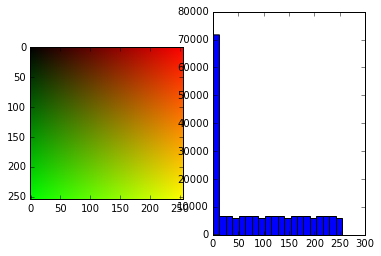

In [64]:
%matplotlib inline

# We'll show the image and its pixel value histogram side-by-side.
_, (ax1, ax2) = plt.subplots(1, 2)

# To interpret the values as a 28x28 image, we need to reshape
# the numpy array, which is one dimensional.
ax1.imshow(pix, cmap=plt.cm.Blues);

ax2.hist(np.reshape(pix,-1), bins=20, range=[0,255]);

In [86]:
from io import StringIO

#Sample interval from EURUSD 5M csv
sampleRows = '20100101,00:10:00,1.4328,1.43293,1.43224,1.43293,176.599999189377\n20100101,00:15:00,1.43285,1.43295,1.43269,1.43292,185.299999475479'

#Example showing how to load into numpy array as a complex/structured type
c = StringIO(unicode(sampleRows))
data = np.loadtxt(c, delimiter=',',  dtype={'names': ('Date', 'Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'),
                      'formats': ('i8', 'S8', 'f8', 'f8', 'f8', 'f8','f8' )})
print 'Example showing how to load into numpy array as a complex/structured type',  data , '\n'

#Example showing how to load into numpy array as a complex/structured type with only the OHLCV data
c = StringIO(unicode(sampleRows))
data = np.loadtxt(c, usecols=(2, 3, 4, 5, 6), delimiter=',',  dtype={'names': ('Open', 'High', 'Low', 'Close', 'Volume'),
                      'formats': ('f8', 'f8', 'f8', 'f8','f8' )})
print 'Example showing how to load into numpy array as a complex/structured type with only the OHLCV data', data, '\n'

#Example showing how to load into numpy array as floats of only the OHLCV data
c = StringIO(unicode(sampleRows))
data = np.loadtxt(c, usecols=(2, 3, 4, 5, 6), delimiter=',')
print 'Example showing how to load into numpy array as floats of only the OHLCV data', data, '\n'

Example showing how to load into numpy array as a complex/structured type [ (20100101, '00:10:00', 1.4328, 1.43293, 1.43224, 1.43293, 176.599999189377)
 (20100101, '00:15:00', 1.43285, 1.43295, 1.43269, 1.43292, 185.299999475479)] 

Example showing how to load into numpy array as a complex/structured type with only the OHLCV data [(1.4328, 1.43293, 1.43224, 1.43293, 176.599999189377)
 (1.43285, 1.43295, 1.43269, 1.43292, 185.299999475479)] 

Example showing how to load into numpy array as floats of only the OHLCV data [[   1.4328        1.43293       1.43224       1.43293     176.59999919]
 [   1.43285       1.43295       1.43269       1.43292     185.29999948]] 



Real work starts here!....

In [86]:
slidingWindow = 128
dataBasePath = '/home/dev/data/prep-5M-EURUSD-128x128x3/'
csvfilename = "/home/dev/data/5M_2016-07-29/EURUSD_5M_2010-01-01_2016-07-29.csv"

#Include column 6 if we want Volume (not now)
data = np.loadtxt(csvfilename, skiprows=1, usecols=(2, 3, 4, 5), delimiter=',', dtype='f8')

print 'Length:', len(data)
for row in range(0,10):
 print data[row]

Length: 492475
[ 1.43283  1.43285  1.43267  1.43277]
[ 1.43284  1.43293  1.43269  1.43284]
[ 1.4328   1.43293  1.43224  1.43293]
[ 1.43285  1.43295  1.43269  1.43292]
[ 1.43282  1.43285  1.43229  1.43282]
[ 1.43285  1.43292  1.43267  1.43275]
[ 1.4328   1.43303  1.43247  1.43271]
[ 1.43265  1.43294  1.43265  1.43284]
[ 1.43287  1.43289  1.43239  1.43281]
[ 1.43285  1.43294  1.43267  1.43291]


(32, 32, 3)
(32, 96)
image_2d: (4, 1)
tmpimg2: (32, 32, 3)
(32, 32, 3)


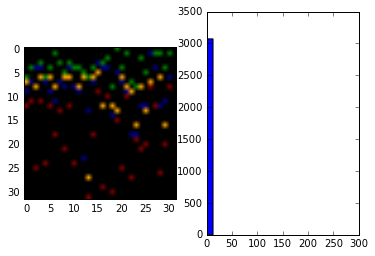

In [87]:
def CreateImageFromSlidingWindow(sourceArray, windowSize, initialIndex):
 openColour = [255,165,0] 
 highColour = [0,128,0]
 lowColour = [128,0,0]
 closeColour =[0,0,128]
 
 imageData = sourceArray[initialIndex:initialIndex + windowSize - 1]
 #print imageData
 min = imageData.min()
 max = imageData.max()
 X = abs((windowSize-1) - ((windowSize-1)*(imageData-min)/(max - min)))
 X = X = X.round().astype(int)
 #print X
    
 # createImageArray
 image = np.zeros((windowSize, windowSize, 3), dtype=np.uint8)
 # for each row in the imageData Array 
 #  The row index corresponds to a column in the ImageArray and the values corresponds to the y index to set)   

 for i in range(0,windowSize-1):
    #set Open
    image[X[i,0],i] = openColour
    #set High
    image[X[i,1],i] = highColour
    #set Low
    image[X[i,2],i] = lowColour
    #set Close
    image[X[i,3],i] = closeColour

 #print np.shape(image)
 return image 
    
# Take sliding window sub set of whole dataset
# normalise values between 0 & sliding window size 
# (except alpha values need to be normailsed between 0 and 255)
# Tranform into new image RGB(a) array where:
#   Open=Orange (255,165,0), High=Green (0,128,0), Close=Blue (0,0,128), Low=Red (128,0,0) and 
#   co-ord in image relates to index in original window and new normalised value

imgsize = 32
tmpimg = CreateImageFromSlidingWindow(data,imgsize,0)
print np.shape(tmpimg)
#print tmpimg[10:30]

pngfile ='/tmp/tmpimage.png'
column_count = imgsize
row_count = imgsize
plane_count = 3

import png, itertools

reshapedImage = np.reshape(tmpimg, ( -1, column_count*plane_count,))
print np.shape(reshapedImage)
#print reshapedImage[10:30]

f = open(pngfile, 'wb')      # binary mode is important
pngWriter = png.Writer(imgsize, imgsize, bitdepth=8)
pngWriter.write(f, reshapedImage)
f.close()

,,pngdata = png.Reader(pngfile).asRGB8()
#image_2d = np.vstack(itertools.imap(np.uint8, pngdata))
image_2d = np.vstack(itertools.imap(np.array, pngdata))
print "image_2d:", np.shape(image_2d)
#print image_2d[0:30]

#image_3d = np.reshape(image_2d,(row_count,column_count,plane_count))
#print np.shape(image_3d)
#print image_3d[10:30]

#plt.imsave(fname=pngfile, arr=tmpimg, format='png') 
tmpimg2 = plt.imread(pngfile)
print "tmpimg2:",  np.shape(tmpimg2)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(tmpimg2);
ax2.hist(np.reshape(tmpimg2,-1), bins=20, range=[0,255]);
#print tmpimg2[10:30]

tmpimg3 = plt.imread(fname=dataBasePath + str(0) + '-' + str(127) + '.png')
print np.shape(tmpimg3)
#print tmpimg3[50:80]

In [88]:
pngfile ='/tmp/tmpimage.png'
column_count = imgsize
row_count = imgsize
plane_count = 3

import png, itertools

reshapedImage = np.reshape(tmpimg, ( -1, column_count*plane_count,))
print np.shape(reshapedImage)
print reshapedImage[10:30]

f = open(pngfile, 'wb')      # binary mode is important
pngWriter = png.Writer(imgsize, imgsize, bitdepth=8)
pngWriter.write(f, reshapedImage)
f.close()

(32, 96)
[[  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]
 [128   0   0 ...,   0   0   0]
 ..., 
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]]


In [89]:
import png

def generateImages(sourceData, windowSize, dataBasePath):
    imageCount = 1#len(sourceData)-windowSize+1
    for i in range(0, imageCount):
     if i % 10000 == 0:
      print 'Processing pass: ' + str(i) + ', index: ' + str(i)
     image = CreateImageFromSlidingWindow(sourceData,windowSize,i)
     #save image file
     #plt.imsave(fname=dataBasePath + str(i) + '-' + str(i+windowSize-1) + '.png', arr=image)
     column_count = windowSize
     row_count = windowSize
     plane_count = 3
     reshapedImage = np.reshape(image, ( -1, column_count*plane_count,))
     f = open(dataBasePath + str(i) + '-' + str(i+windowSize-1) + '.png', 'wb')      # binary mode is important
     pngWriter = png.Writer(column_count, row_count, bitdepth=8)
     pngWriter.write(f, reshapedImage)
     f.close()

In [90]:
generateImages(data, slidingWindow, dataBasePath)

Processing pass: 0, index: 0


In [81]:
# Now produce some labels in a format that TFLearn can use...
#/path/to/img1 class_id
#/path/to/img2 class_id
#/path/to/img3 class_id
def shift(data, amount):
    data = data[:-amount]
    pad = (amount, 0)
    return np.pad(data, pad, mode='constant', constant_values=(np.nan,))

# Where C[0]>C[-1] Class = 0
# Where C[0]>C[-1] Class = 1
# Where C[0]>C[-1] Class = 2
def generateLabels(sourceArray):
    O, H, L, C = sourceArray.T
    C1 = shift(C, 1)
    labels = np.where(C>C1, 1, np.where(C<C1,2, 0))
    return labels

labels = generateLabels(data[0:50000])#[0:10000])
print labels[128:138], len(labels)

def generateLabelFile(labelData, windowSize, dataBasePath):
    labelCount = len(labelData)-windowSize+1
    print labelCount
    labelRows = np.empty((labelCount),np.dtype(object))
    for i in range(0, labelCount):
        #print dataBasePath + str(i) + '-' + str(i + windowSize - 1)  + '.png' + ' ' + str(labelData[i])
        labelRows[i] = dataBasePath + str(i) + '-' + str(i + windowSize - 1)  + '.png' + ' ' + str(labelData[i])
    return labelRows

labelFile = generateLabelFile(labels,slidingWindow, dataBasePath)
print labelFile[0:5]
np.savetxt(dataBasePath + 'labels.txt', labelFile, fmt='%s')



[1 2 1 2 2 1 2 0 2 1] 50000
49873
['/home/dev/data/prep-5M-EURUSD/0-127.png 0'
 '/home/dev/data/prep-5M-EURUSD/1-128.png 1'
 '/home/dev/data/prep-5M-EURUSD/2-129.png 1'
 '/home/dev/data/prep-5M-EURUSD/3-130.png 2'
 '/home/dev/data/prep-5M-EURUSD/4-131.png 2']


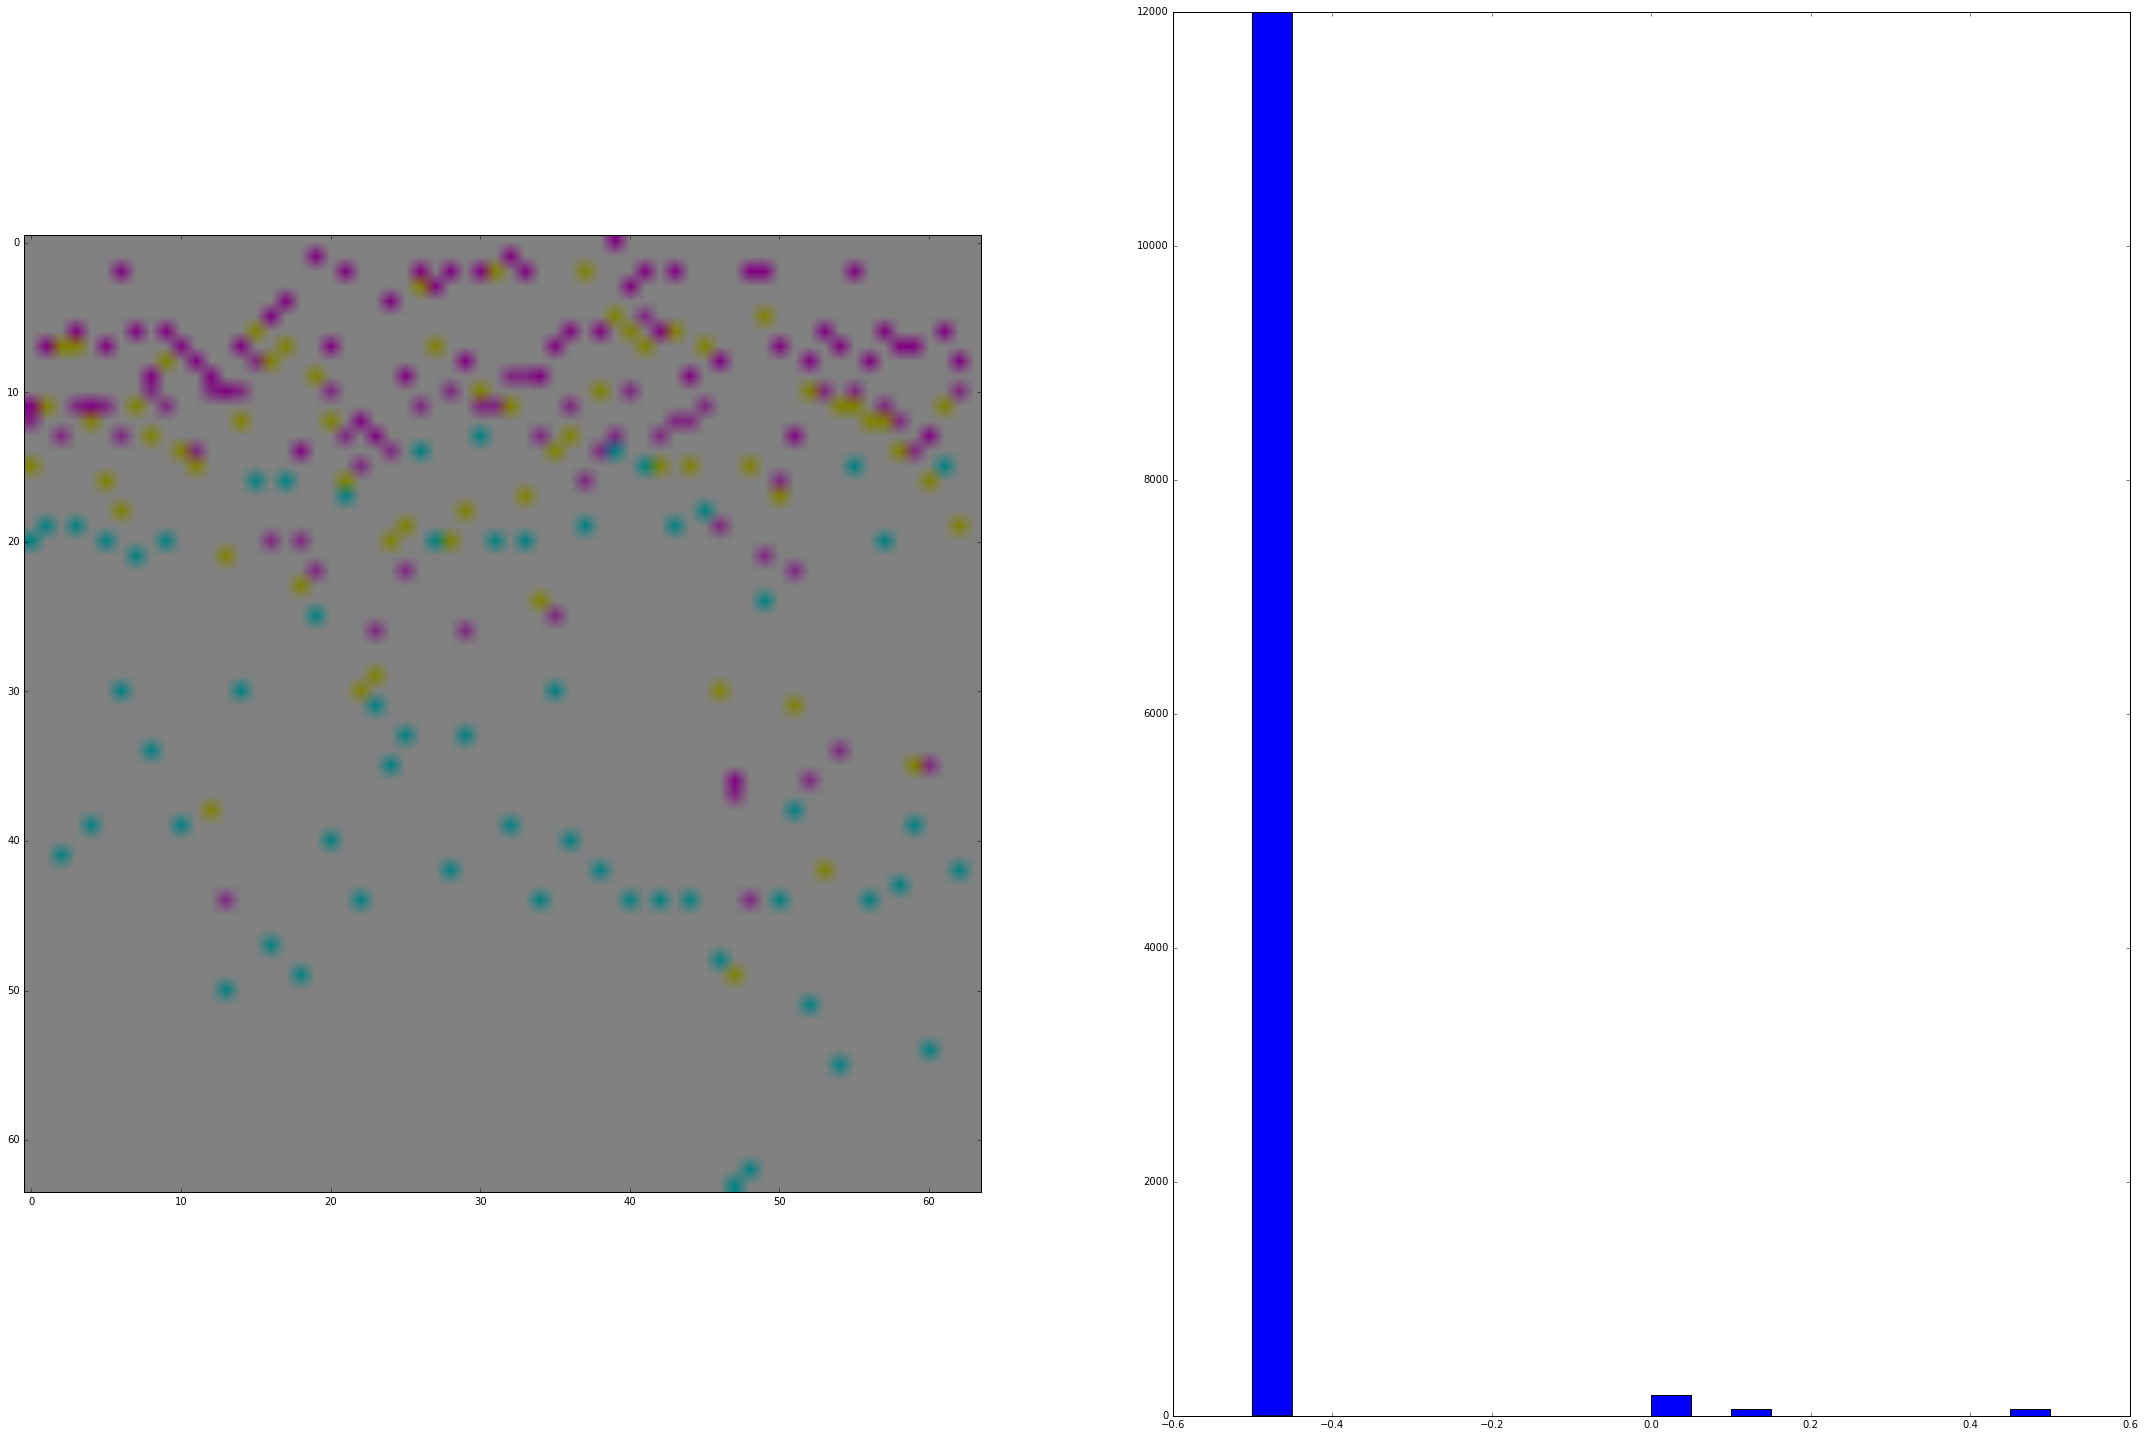

In [73]:
# Let's convert the uint8 image to 32 bit floats and rescale 
# the values to be centered around 0, between [-0.5, 0.5]. 
# 
# We again plot the image and histogram to check that we 
# haven't mangled the data.
image = CreateImageFromSlidingWindow(data,64,0)
scaled = image.astype(np.float32)
scaled = (scaled - (255 / 2.0)) / 255
#print scaled[3]

_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(scaled);
plt.subplots_adjust(top=5, right=5)
ax2.hist(scaled.reshape(-1), bins=20, range=[-0.5, 0.5]);

In [ ]:
from __future__ import division, print_function, absolute_import

#Hyperparamters
validationPC = 0.1


# Import tflearn and some helpers
import tflearn
from tflearn.data_utils import shuffle, to_categorical
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.estimator import regression
from tflearn.data_preprocessing import ImagePreprocessing
from tflearn.data_augmentation import ImageAugmentation

import pickle

# Load path/class_id image file:
dataset_file = dataBasePath + 'labels.txt'

# Build the preloader array, resize images to 128x128
from tflearn.data_utils import image_preloader
X, Y = image_preloader(dataset_file, image_shape=(128, 128),   mode='file', categorical_labels=True,   normalize=True)

# Build neural network and train

validationSize = np.round(len(Y) * validationPC)

# Data loading and preprocessing
# Shuffle the data
X, Y = shuffle(X, Y)

Y_test = Y[0:validationSize]
X_test = X[0:validationSize]
X = X[validationSize:]
Y = Y[validationSize:]

# Y = to_categorical(Y, 10)
# Y_test = to_categorical(Y_test, 10)

# Make sure the data is normalized
img_prep = ImagePreprocessing()
img_prep.add_featurewise_zero_center()
img_prep.add_featurewise_stdnorm()

# Define our network architecture:

# Input is a 32x32 image with 3 color channels (red, green and blue)
network = input_data(shape=[None, 128, 128, 3],
                     data_preprocessing=img_prep,
                     data_augmentation=img_aug)

# Step 1: Convolution
network = conv_2d(network, 128, 3, activation='relu')

# Step 2: Max pooling
network = max_pool_2d(network, 2)

# Step 3: Convolution again
network = conv_2d(network, 256, 3, activation='relu')

# Step 4: Convolution yet again
network = conv_2d(network, 256, 3, activation='relu')

# Step 5: Max pooling again
network = max_pool_2d(network, 2)

# Step 6: Fully-connected 512 node neural network
network = fully_connected(network, 1024, activation='relu')

# Step 7: Dropout - throw away some data randomly during training to prevent over-fitting
network = dropout(network, 0.5)

# Step 8: Fully-connected neural network with two outputs (0=isn't a bird, 1=is a bird) to make the final prediction
network = fully_connected(network, 3, activation='softmax', restore=False)

# Tell tflearn how we want to train the network
network = regression(network, optimizer='adam',
                     loss='categorical_crossentropy',
                     learning_rate=0.001)

# Wrap the network in a model object
model = tflearn.DNN(network, tensorboard_verbose=3, 
                    checkpoint_path='home/dev/data-science/next-interval-classifier.checkpoints/next-interval-classifier.tfl.ckpt')

# Train it! We'll do 100 training passes and monitor it as it goes.
model.fit(X, Y, n_epoch=10, shuffle=True, validation_set=(X_test, Y_test),
          show_metric=True, batch_size=96,
          snapshot_epoch=True,
          run_id='next-interval-classifier-01')

# Save model when training is complete to a file
model.load("next-interval-classifier.tfl")
print("Network trained and saved as next-interval-classifier.tfl!")

